In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical
import warnings
warnings.filterwarnings("ignore")

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

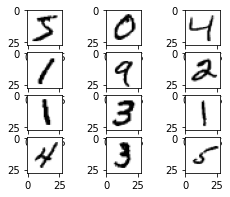

In [3]:
plt.figure(figsize=(4,3))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.grid(False)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
plt.show()

In [4]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
input_shape = (28, 28, 1)
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation = 'softmax'))

In [8]:
model.compile(
    optimizer = 'Adam',
    loss = "categorical_crossentropy",
    metrics = ['accuracy']

)

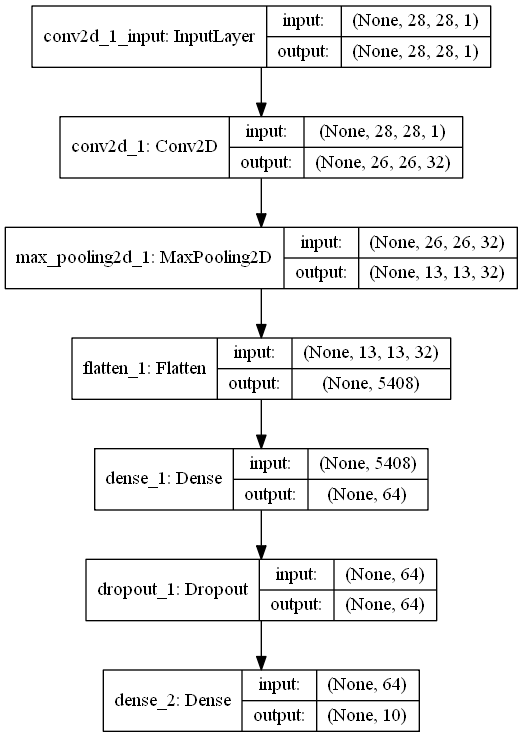

In [9]:
tf.keras.utils.plot_model(model, "vbu-mnist.png", show_shapes = True, show_layer_names = True)

In [10]:
history = model.fit(
    X_train,
    y_train,
    verbose = 2,
    epochs = 5,
    batch_size = 16,
    validation_split = 0.2
)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
 - 45s - loss: 0.3372 - accuracy: 0.8972 - val_loss: 0.1185 - val_accuracy: 0.9665
Epoch 2/5
 - 39s - loss: 0.1655 - accuracy: 0.9487 - val_loss: 0.0853 - val_accuracy: 0.9747
Epoch 3/5
 - 43s - loss: 0.1295 - accuracy: 0.9611 - val_loss: 0.0715 - val_accuracy: 0.9793
Epoch 4/5
 - 37s - loss: 0.1065 - accuracy: 0.9670 - val_loss: 0.0715 - val_accuracy: 0.9803
Epoch 5/5
 - 38s - loss: 0.0946 - accuracy: 0.9695 - val_loss: 0.0775 - val_accuracy: 0.9799


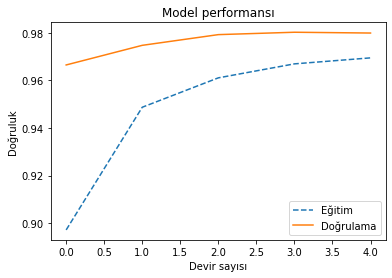

In [12]:
plt.plot(history.history["accuracy"], '--')
plt.plot(history.history["val_accuracy"])
plt.title("Model performansı")
plt.xlabel("Devir sayısı")
plt.ylabel("Doğruluk")
plt.legend(["Eğitim", "Doğrulama"], loc = 'lower right')
plt.show()

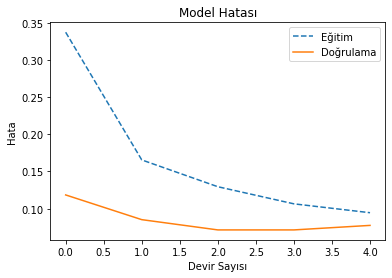

In [13]:
plt.plot(history.history["loss"], '--')
plt.plot(history.history["val_loss"])
plt.title("Model Hatası")
plt.xlabel("Devir Sayısı")
plt.ylabel("Hata")
plt.legend(["Eğitim", "Doğrulama"], loc = 'upper right')
plt.show()

In [14]:
performans = model.evaluate(X_test, y_test, verbose = 0)
print("Modelin test performansı: %.2f%%" % (performans[1]*100))

Modelin test performansı: 98.03%


In [15]:
#Recurrent Neural Networks

In [16]:
import numpy 
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding, SimpleRNN
from keras.preprocessing import sequence

In [17]:
num_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_words)
print(X_train)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 

In [18]:
print(X_train.shape)

(25000,)


In [19]:
max_kelime = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_kelime)
X_test = sequence.pad_sequences(X_test, maxlen = max_kelime)
print("Eğitim kümesinin son hali : \n", X_train)

Eğitim kümesinin son hali : 
 [[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]


In [21]:
print("Eğitim kümesinin boyutları : ", X_train.shape)

Eğitim kümesinin boyutları :  (25000, 500)


In [22]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(
          num_words,
          embedding_vector_length))
model.add(SimpleRNN(64))
model.add(Dense(
          1,
          activation = "sigmoid"))

In [23]:
model.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


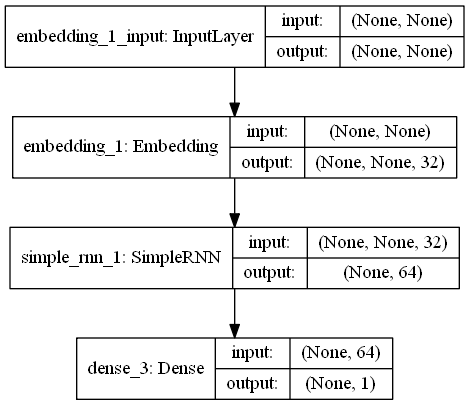

In [24]:
tf.keras.utils.plot_model(model, "VBU-Group1-RNN.png", show_shapes = True, show_layer_names = True)

In [25]:
history = model.fit(
         X_train,
         y_train,
         epochs = 10,
         batch_size = 512,
         validation_split = 0.2
         )

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.6745 - accuracy: 0.5682 - val_loss: 0.6148 - val_accuracy: 0.6994
Epoch 2/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.6105 - accuracy: 0.6812 - val_loss: 0.6502 - val_accuracy: 0.6204
Epoch 3/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.5406 - accuracy: 0.7626 - val_loss: 0.5302 - val_accuracy: 0.7356
Epoch 4/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.3644 - accuracy: 0.8461 - val_loss: 0.3774 - val_accuracy: 0.8398
Epoch 5/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.2803 - accuracy: 0.8889 - val_loss: 0.4068 - val_accuracy: 0.8280
Epoch 6/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.2395 - accuracy: 0.9086 - val_loss: 0.3686 - val_accuracy: 0.8504
Epoch 7/10
20000/20000 [==============================] - 34s 2ms/ste

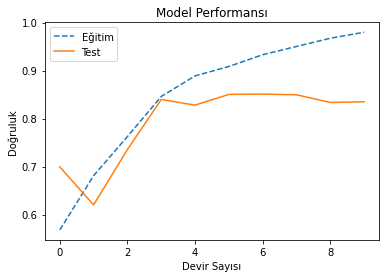

In [26]:
plt.plot(history.history["accuracy"], "--")
plt.plot(history.history["val_accuracy"])
plt.title("Model Performansı")
plt.xlabel("Devir Sayısı")
plt.ylabel("Doğruluk")
plt.legend(["Eğitim", "Test"], loc = "upper left")
plt.show()

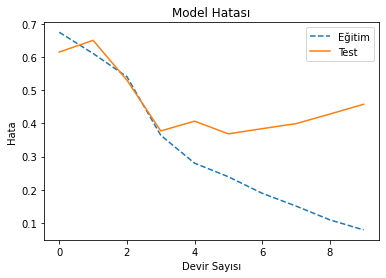

In [28]:
plt.plot(history.history["loss"], "--")
plt.plot(history.history["val_loss"])
plt.title("Model Hatası")
plt.xlabel("Devir Sayısı")
plt.ylabel("Hata")
plt.legend(["Eğitim", "Test"], loc = "upper right")
plt.show()

In [29]:
performans = model.evaluate(X_test, y_test, verbose = 0)
print("Modelin Doğruluğu : %.2f%%" % (performans[1]*100))

Modelin Doğruluğu : 82.37%


In [30]:
#Long Short Term Memory (Uzun ömürlü kısa dönem belleği)

In [35]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding, LSTM
from keras.preprocessing import sequence

In [36]:
num_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_words)
print(X_train)
print(X_train.shape)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 

In [37]:
max_kelime = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_kelime)
X_test = sequence.pad_sequences(X_test, maxlen = max_kelime)

print("Eğitim kümesinin son hali: \n", X_train)
print("Eğitim kümesinin boyutları :", X_train.shape)

Eğitim kümesinin son hali: 
 [[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]
Eğitim kümesinin boyutları : (25000, 500)


In [38]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(num_words, embedding_vector_length))
model.add(LSTM(64))
model.add(Dense(1, activation = "sigmoid"))

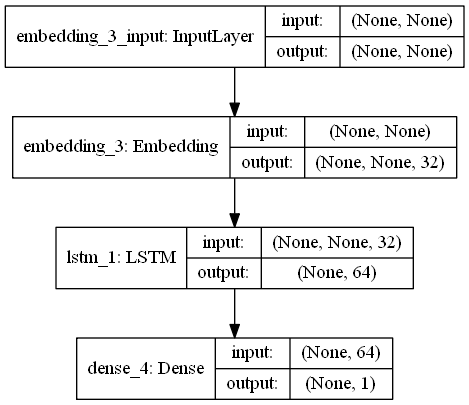

In [39]:
tf.keras.utils.plot_model(model, "RNN-IMDB.png", show_shapes = True, show_layer_names = True)

In [40]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [41]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 184,897
Trainable params: 184,897
Non-trainable params: 0
_________________________________________________________________
None


In [42]:
history = model.fit(
          X_train,
          y_train,
          epochs = 10,
          batch_size = 512,
          validation_split = 0.2
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 150s 7ms/step - loss: 0.6816 - accuracy: 0.5782 - val_loss: 0.6621 - val_accuracy: 0.5802
Epoch 2/10
20000/20000 [==============================] - 143s 7ms/step - loss: 0.6386 - accuracy: 0.6835 - val_loss: 0.5609 - val_accuracy: 0.7678
Epoch 3/10
20000/20000 [==============================] - 166s 8ms/step - loss: 0.4211 - accuracy: 0.8262 - val_loss: 0.3727 - val_accuracy: 0.8490
Epoch 4/10
20000/20000 [==============================] - 189s 9ms/step - loss: 0.2893 - accuracy: 0.8845 - val_loss: 0.2958 - val_accuracy: 0.8800
Epoch 5/10
20000/20000 [==============================] - 211s 11ms/step - loss: 0.2335 - accuracy: 0.9133 - val_loss: 0.2972 - val_accuracy: 0.8752
Epoch 6/10
20000/20000 [==============================] - 220s 11ms/step - loss: 0.2050 - accuracy: 0.9241 - val_loss: 0.3253 - val_accuracy: 0.8818
Epoch 7/10
20000/20000 [==============================] - 224

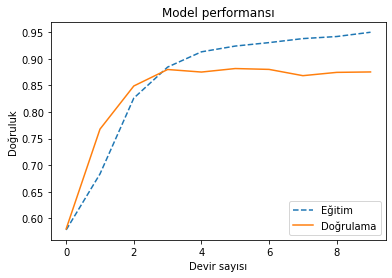

In [43]:
plt.plot(history.history["accuracy"], '--')
plt.plot(history.history["val_accuracy"])
plt.title("Model performansı")
plt.xlabel("Devir sayısı")
plt.ylabel("Doğruluk")
plt.legend(["Eğitim", "Doğrulama"], loc = 'lower right')
plt.show()

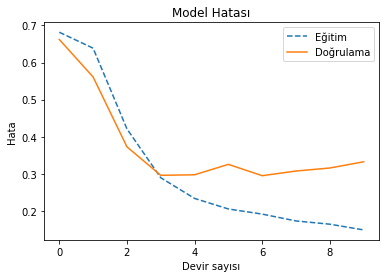

In [45]:
plt.plot(history.history["loss"], '--')
plt.plot(history.history["val_loss"])
plt.title("Model Hatası")
plt.xlabel("Devir sayısı")
plt.ylabel("Hata")
plt.legend(["Eğitim", "Doğrulama"], loc = 'upper right')
plt.show()

In [46]:
performans = model.evaluate(X_test, y_test, verbose = 0)
print("Modelin test performansı: %.2f%%" % (performans[1]*100))

Modelin test performansı: 86.74%
